# Generalized Optimal Sparse Decision Trees (GOSDT)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.model_selection as sk_ms
import sklearn.tree as sk_tr
import sklearn.metrics as sk_m
import gosdt

In [45]:
df = pd.read_csv('labeled_acquisition_dataset.csv')

features_df = df.drop(columns=["TargetName",
    "TargetTicker",
    "AcquirerName", 
    "TransactionAnnouncementDate", 
    "DealValuation", 
    "RetroactiveDCFValuation", 
    "Label",
    "RatioOfRankvalueToNetIncome",
    "RatioOfRankvalueToCashFlow",
    "RatioOfRankvalueToSales",
    "DebtServiceCoverageRatio"
    ])
feature_names = features_df.columns.to_list()
class_df = df['Label']

features_train, features_test, class_train, class_test = sk_ms.train_test_split(features_df, class_df, test_size=0.2, random_state=11)

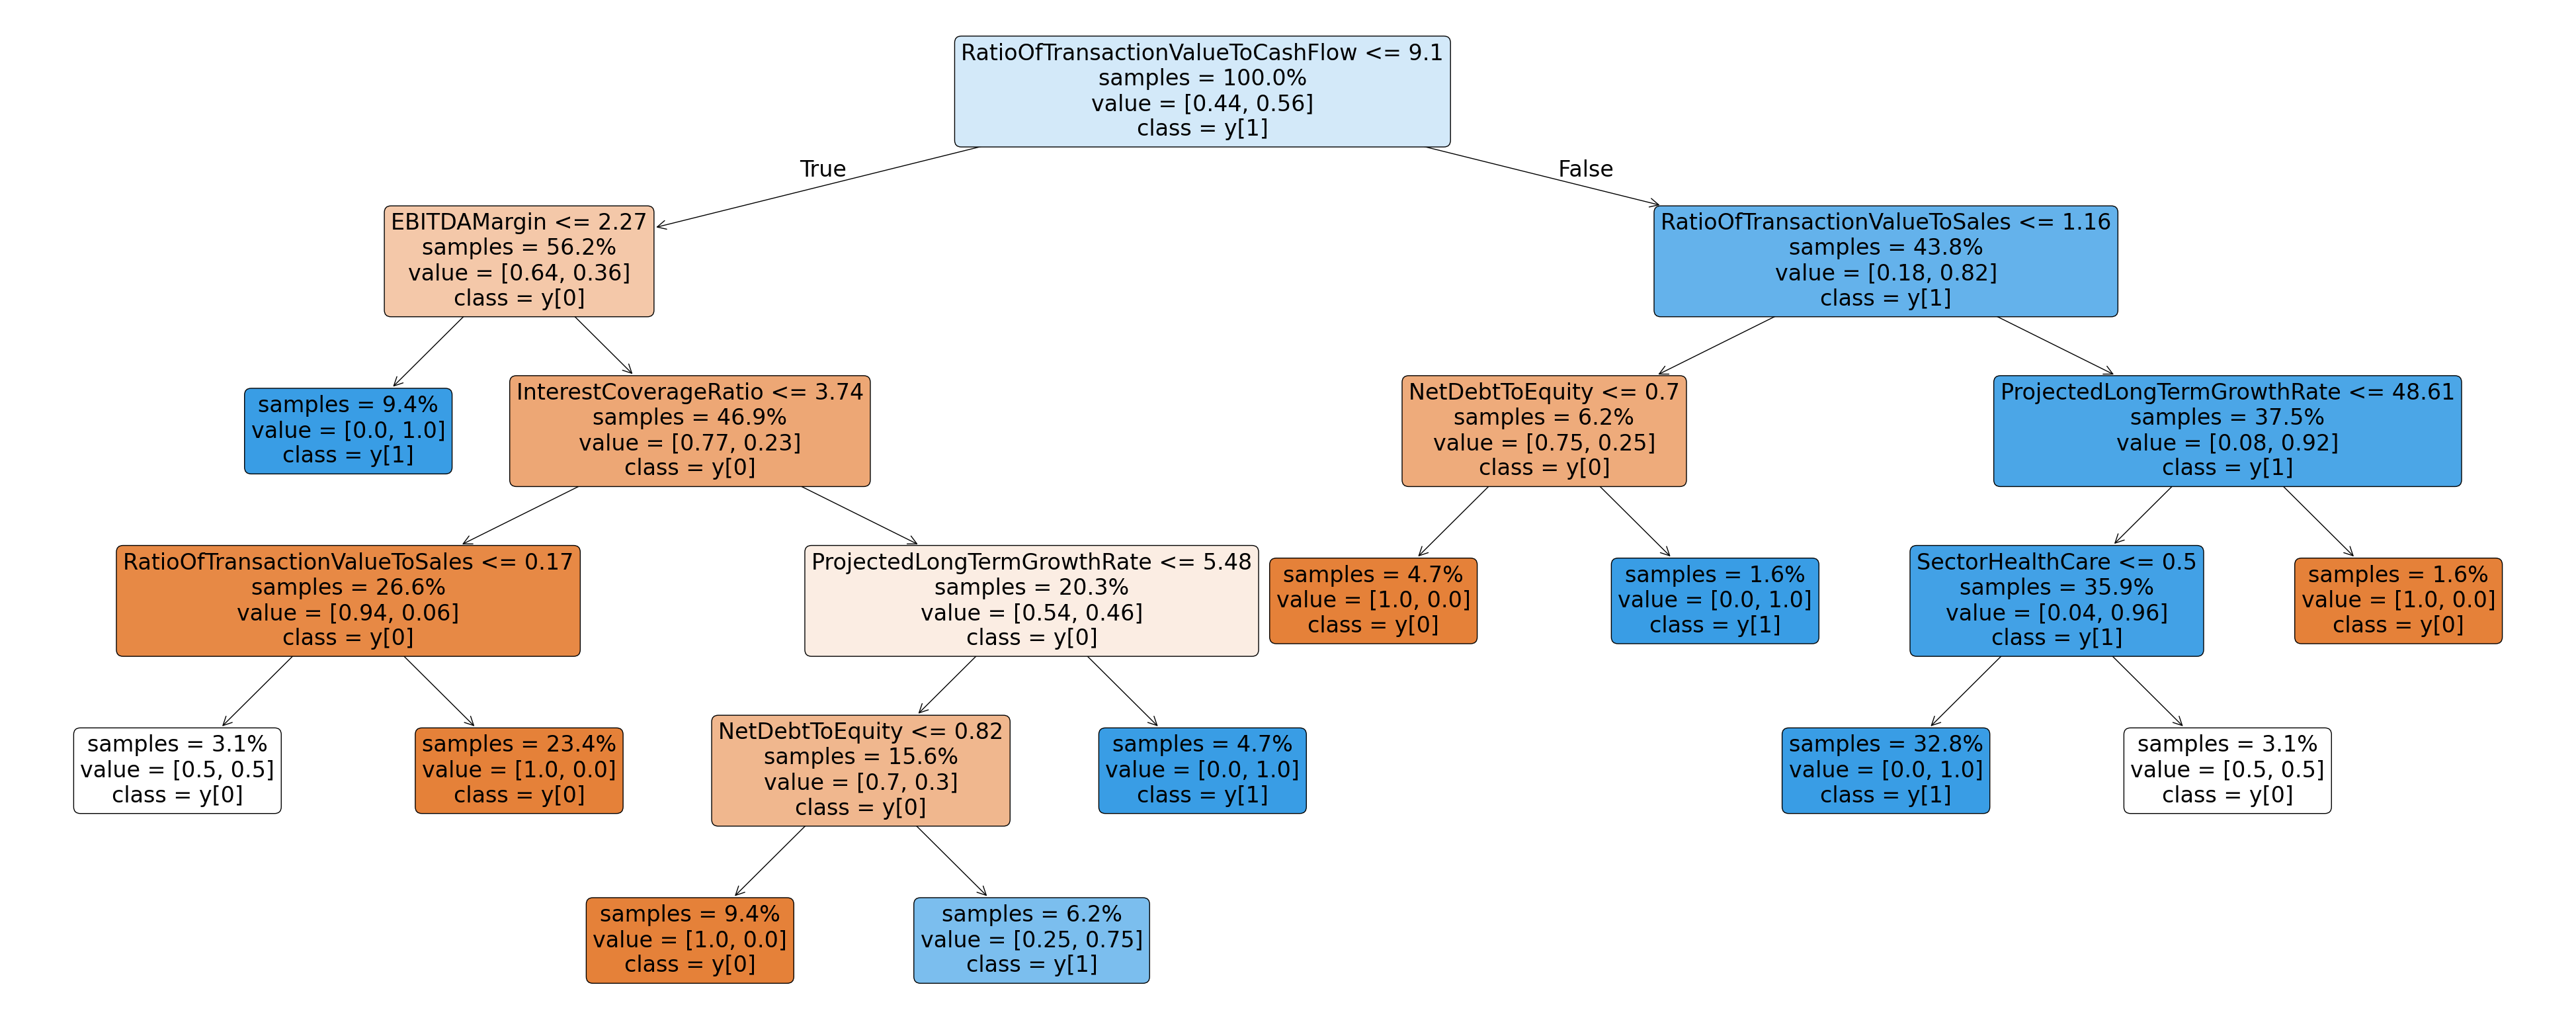

Accuracy on test set: 0.75
F1 score on test set: 0.75
AUC on test set: 0.7619047619047621


In [46]:
classifier = sk_tr.DecisionTreeClassifier(max_depth=5, min_samples_split=3)
classifier.fit(features_train, class_train)
plt.figure(figsize=(50, 20))
sk_tr.plot_tree(classifier, filled=True, rounded=True, class_names=True, feature_names=feature_names, fontsize=24, impurity=False, proportion=True, precision=2)
plt.show()

predictions = classifier.predict(features_test)

# Compute performance metrics on the test set
accuracy = sk_m.accuracy_score(class_test, predictions)
f1 = sk_m.f1_score(class_test, predictions)
auc = sk_m.roc_auc_score(class_test, predictions)

# Print out the performance metrics
print(f"Accuracy on test set: {accuracy}")
print(f"F1 score on test set: {f1}")
print(f"AUC on test set: {auc}")

In [23]:
# No GridSearch CV
# Set the regularization value and model configuration
regularization_val = 0.03  # You can adjust this value as needed
configuration = {
    'regularization': regularization_val,
    'depth_budget': 5,
    'balance': True,
    'no_repeat_splits': True
}

# Initialize and train the model
model = gosdt.GOSDT(configuration)
model.fit(features_train, class_train)

# Make predictions on the test set
predictions = model.predict(features_test)

# Compute performance metrics on the test set
accuracy = sk_m.accuracy_score(class_test, predictions)
f1 = sk_m.f1_score(class_test, predictions)
auc = sk_m.roc_auc_score(class_test, predictions)

# Print out the performance metrics
print(f"Accuracy on test set: {accuracy}")
print(f"F1 score on test set: {f1}")
print(f"AUC on test set: {auc}")


: 

: 

In [20]:
print(model.tree)

if 9.703501 <= RatioOfTransactionValueToCashFlow then:
    predicted class: 1
    misclassification penalty: 0.054
    complexity penalty: 0.05

else if 0.232 <= RatioOfTransactionValueToCashFlow < 9.703501 then:
    predicted class: 0
    misclassification penalty: 0.083
    complexity penalty: 0.05

else if RatioOfTransactionValueToCashFlow < 0.232 then:
    predicted class: 1
    misclassification penalty: 0.036
    complexity penalty: 0.05


In [ ]:
# Initialize SciKit KFold
kf = sk_ms.KFold(n_splits=5, shuffle=True, random_state=7)
folds = kf.split(features_train)

regularization_vals = [0.01, 0.05, 0.1, 0.2, 0.5, 1]

mean_accuracy_scores = []
mean_f1_scores = []
mean_auc_scores = []

for reg_val in regularization_vals:
     
    configuration = {
        'regularization': reg_val,
        'depth_budget': 3,
        'balance': True
    }
     
    model = gosdt.GOSDT(configuration)

    accuracy_scores = []
    f1_scores =[]
    auc_scores = []

    for train_index, test_index in folds:

        # Split feature and class data into training and test sets for the current fold
        cross_features_train, cross_features_test = features_train.iloc[train_index], features_train.iloc[test_index]
        cross_class_train, cross_class_test = class_train.iloc[train_index], class_train.iloc[test_index]

        model.fit(cross_features_train, cross_class_train)
        predictions = model.predict(cross_features_test)

        # Compute accuracy, f1, auc
        accuracy = sk_m.accuracy_score(cross_class_test, predictions)
        f1 = sk_m.f1_score(cross_class_test, predictions)
        auc = sk_m.roc_auc_score(cross_class_test, predictions)

        # Append scores to the list for the configuration
        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
        auc_scores.append(auc)
    
    # Append the means for the cross-validation to the lists
    mean_accuracy_scores.append(np.mean(accuracy_scores))
    mean_f1_scores.append(np.mean(f1_scores))
    mean_auc_scores.append(np.mean(auc_scores))


# Find the index of the maximum mean accuracy score
best_accuracy_index = np.argmax(mean_accuracy_scores)
best_accuracy_reg_val = regularization_vals[best_accuracy_index]

# Find the index of the maximum mean F1 score
best_f1_index = np.argmax(mean_f1_scores)
best_f1_reg_val = regularization_vals[best_f1_index]

# Find the index of the maximum mean AUC score
best_auc_index = np.argmax(mean_auc_scores)
best_auc_reg_val = regularization_vals[best_auc_index]

print(f"Best regularization value for accuracy: {best_accuracy_reg_val}")
print(f"Best regularization value for F1 score: {best_f1_reg_val}")
print(f"Best regularization value for AUC: {best_auc_reg_val}")
